In [1]:
#!pip install pyspark==3.0.1 py4j==0.10.9

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyspark.sql import SparkSession
import pandas as pd

spark = SparkSession.builder\
        .master("local[2]")\
        .appName('PySpark_Iris')\
        .getOrCreate()

### Загрузите данные при помощи spark.read.csv из приложенного файла.

In [3]:
# Чтение CSV файла
csv_file = './Data/iris_csv.csv'
df = spark.read.csv(csv_file, sep=',', inferSchema= True, header=True)
df.printSchema()

root
 |-- sepallength: double (nullable = true)
 |-- sepalwidth: double (nullable = true)
 |-- petallength: double (nullable = true)
 |-- petalwidth: double (nullable = true)
 |-- class: string (nullable = true)



In [4]:
# переименуем столбцы по условию задачи
df=df.withColumnRenamed("sepallength","sepal_length") \
  .withColumnRenamed("sepalwidth","sepal_width") \
  .withColumnRenamed("petallength","petal_length") \
  .withColumnRenamed("petalwidth","petal_width")

### Выведите 5 первых строк данных.

In [5]:
df.show(5)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



### Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length', 'sepal_width', 'petal_length', 'petal_width').

In [6]:
print('Статистика датафрейма')
df.describe().show()

Статистика датафрейма
+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|         class|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+



In [7]:
# Сгруппируем по наименованию класса
df_grp=df.groupby('class')

#### Статистика `sepal_length`

In [8]:
df_grp.avg('sepal_length').show()
df_grp.min('sepal_length').show()
df_grp.max('sepal_length').show()

+---------------+-----------------+
|          class|avg(sepal_length)|
+---------------+-----------------+
| Iris-virginica|6.587999999999998|
|    Iris-setosa|5.005999999999999|
|Iris-versicolor|            5.936|
+---------------+-----------------+

+---------------+-----------------+
|          class|min(sepal_length)|
+---------------+-----------------+
| Iris-virginica|              4.9|
|    Iris-setosa|              4.3|
|Iris-versicolor|              4.9|
+---------------+-----------------+

+---------------+-----------------+
|          class|max(sepal_length)|
+---------------+-----------------+
| Iris-virginica|              7.9|
|    Iris-setosa|              5.8|
|Iris-versicolor|              7.0|
+---------------+-----------------+



#### Статистика `sepal_width`

In [9]:
df_grp.avg('sepal_width').show()
df_grp.min('sepal_width').show()
df_grp.max('sepal_width').show()

+---------------+------------------+
|          class|  avg(sepal_width)|
+---------------+------------------+
| Iris-virginica|2.9739999999999998|
|    Iris-setosa|3.4180000000000006|
|Iris-versicolor|2.7700000000000005|
+---------------+------------------+

+---------------+----------------+
|          class|min(sepal_width)|
+---------------+----------------+
| Iris-virginica|             2.2|
|    Iris-setosa|             2.3|
|Iris-versicolor|             2.0|
+---------------+----------------+

+---------------+----------------+
|          class|max(sepal_width)|
+---------------+----------------+
| Iris-virginica|             3.8|
|    Iris-setosa|             4.4|
|Iris-versicolor|             3.4|
+---------------+----------------+



#### Статистика `petal_length`

In [10]:
df_grp.avg('petal_length').show()
df_grp.min('petal_length').show()
df_grp.max('petal_length').show()

+---------------+-----------------+
|          class|avg(petal_length)|
+---------------+-----------------+
| Iris-virginica|            5.552|
|    Iris-setosa|            1.464|
|Iris-versicolor|             4.26|
+---------------+-----------------+

+---------------+-----------------+
|          class|min(petal_length)|
+---------------+-----------------+
| Iris-virginica|              4.5|
|    Iris-setosa|              1.0|
|Iris-versicolor|              3.0|
+---------------+-----------------+

+---------------+-----------------+
|          class|max(petal_length)|
+---------------+-----------------+
| Iris-virginica|              6.9|
|    Iris-setosa|              1.9|
|Iris-versicolor|              5.1|
+---------------+-----------------+



#### Статистика `petal_width`

In [11]:
df_grp.avg('petal_width').show()
df_grp.min('petal_width').show()
df_grp.max('petal_width').show()

+---------------+------------------+
|          class|  avg(petal_width)|
+---------------+------------------+
| Iris-virginica|             2.026|
|    Iris-setosa|0.2439999999999999|
|Iris-versicolor|1.3259999999999998|
+---------------+------------------+

+---------------+----------------+
|          class|min(petal_width)|
+---------------+----------------+
| Iris-virginica|             1.4|
|    Iris-setosa|             0.1|
|Iris-versicolor|             1.0|
+---------------+----------------+

+---------------+----------------+
|          class|max(petal_width)|
+---------------+----------------+
| Iris-virginica|             2.5|
|    Iris-setosa|             0.6|
|Iris-versicolor|             1.8|
+---------------+----------------+



### Постройте точечную диаграмму для petal_length и petal_width, раскрашенный по типам цветков.

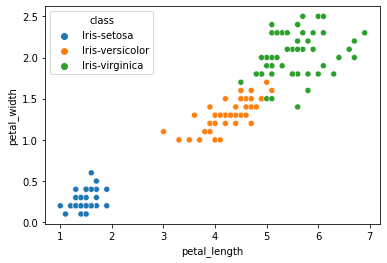

In [12]:
dfp = df.toPandas()
sns.scatterplot(x='petal_length', y='petal_width', data=dfp, hue='class');

### Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN).

**Правило: ЕСЛИ `(petal_length < 2)` ТО `setosa` ИНАЧЕ `unknown`**

In [13]:
dfs = df.where(df['petal_length']<2)
dfs.show(3)
print('Количество измерений, соответствующих условию: ', dfs.count())

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 3 rows

Количество измерений, соответствующих условию:  50


### При помощи команд `withColumn, when, otherwise` создайте в датафрейме новую колонку с таким предсказанием.

In [14]:
from pyspark.sql.functions import when
df = df.withColumn('predict',
             when(df['petal_length'] < 2, 'setosa')
             .otherwise('unknown'))
print('Обновленный датафрейм')
df.show(3)

Обновленный датафрейм
+------------+-----------+------------+-----------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|      class|predict|
+------------+-----------+------------+-----------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa| setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa| setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa| setosa|
+------------+-----------+------------+-----------+-----------+-------+
only showing top 3 rows



### Проверьте качество своего предсказания.

#### Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa.

In [15]:
full = df.where(df['class'] == 'Iris-setosa').count()
marked = df.where((df['class'] == 'Iris-setosa')&(df['predict'] == 'setosa')).count()
print('Промаркировано {} из {}'.format(marked, full))

Промаркировано 50 из 50


#### Подсчитайте количество строк, где Вы предсказали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [16]:
mark_error =  df.where((df['class'] != 'Iris-setosa')&(df['predict'] == 'setosa')).count()
print('Ошибок маркировки', mark_error)

Ошибок маркировки 0


#### Вывод

Предсказание полностью соответствует действительности, все измерения для `Iris-setosa` промаркированы корректно. 